In [88]:
from tqdm import tqdm
from pathlib import Path
import pandas as pd

In [89]:
data_dir = f"{Path.cwd().parent.parent}/data"
data_dir

'/home/sud/dev/mRNA/data'

In [90]:
with open(f'{data_dir}/GSE120584_series_matrix.txt', 'rt') as f:
    for i, line in enumerate(f):
        print(f"Line {i}: {line.strip()}")
        if i > 100:
            break

Line 0: !Series_title	"Risk prediction models for dementia constructed by supervised principal component analysis using miRNA expression data"
Line 1: !Series_geo_accession	"GSE120584"
Line 2: !Series_status	"Public on Feb 26 2019"
Line 3: !Series_submission_date	"Sep 27 2018"
Line 4: !Series_last_update_date	"Nov 03 2021"
Line 5: !Series_pubmed_id	"30820472"
Line 6: !Series_pubmed_id	"31666070"
Line 7: !Series_pubmed_id	"34686734"
Line 8: !Series_summary	"Alzheimer’s disease (AD) is the most common subtype of dementia, followed by Vascular Dementia (VaD), and Dementia with Lewy Bodies (DLB). Recently, microRNAs (miRNAs) have received a lot of attention as the novel biomarkers for dementia. Here, using serum miRNA expression of 1,601 Japanese individuals, we investigated potential miRNA bio- markers and constructed risk prediction models, based on a supervised principal component analysis (PCA) logistic regression method, according to the subtype of dementia. The final risk prediction 

First 71 lines appear to be the metadata and Series matrix begins at Line 73, lets find that line programmatically.

In [91]:
with open(f'{data_dir}/GSE120584_series_matrix.txt', 'rt') as f:
    for i, line in enumerate(f):
        if '!series_matrix_table_begin' in line:
            data_start_line = i + 1
            break
data_start_line

73

In [92]:
expression_df = pd.read_csv(f'{data_dir}/GSE120584_series_matrix.txt', 
                              sep='\t', 
                              skiprows=data_start_line,
                              header=0)

print(f"Series matrix loaded: {expression_df.shape}")
print(f"Samples: {expression_df.shape[1]}")
print(f"Features (probes): {expression_df.shape[0]}")

Series matrix loaded: (2563, 1602)
Samples: 1602
Features (probes): 2563


The paper metnioned "a total of 2547 miRNAs were identified in the expression profiles" but for now. lets go with what we got. We can check later why this difference if they used the same dataset.

Let's have a look at the metadata to better understand the data. Lets get the titles.

In [93]:
with open(f'{data_dir}/GSE120584_series_matrix.txt', 'rt') as f:
    for line in f:
        if line.strip().startswith('!Sample_title'): 
            parts = line.strip().split('\t')
            print(parts)
            sample_titles  = [part.replace('"','') for part in parts[1:]]
             
        if '!series_matrix_table_begin' in line:
            break

['!Sample_title', '"AD_0001"', '"AD_0002"', '"AD_0003"', '"AD_0004"', '"AD_0005"', '"AD_0006"', '"AD_0007"', '"AD_0008"', '"AD_0009"', '"AD_0010"', '"AD_0011"', '"AD_0012"', '"AD_0013"', '"AD_0014"', '"AD_0015"', '"AD_0016"', '"AD_0017"', '"AD_0018"', '"AD_0019"', '"AD_0020"', '"AD_0021"', '"AD_0022"', '"AD_0023"', '"AD_0024"', '"AD_0025"', '"AD_0026"', '"AD_0027"', '"AD_0028"', '"AD_0029"', '"AD_0030"', '"AD_0031"', '"AD_0032"', '"AD_0033"', '"AD_0034"', '"AD_0035"', '"AD_0036"', '"AD_0037"', '"AD_0038"', '"AD_0039"', '"AD_0040"', '"AD_0041"', '"AD_0042"', '"AD_0043"', '"AD_0044"', '"AD_0045"', '"AD_0046"', '"AD_0047"', '"AD_0048"', '"AD_0049"', '"AD_0050"', '"AD_0051"', '"AD_0052"', '"AD_0053"', '"AD_0054"', '"AD_0055"', '"AD_0056"', '"AD_0057"', '"AD_0058"', '"AD_0059"', '"AD_0060"', '"AD_0061"', '"AD_0062"', '"AD_0063"', '"AD_0064"', '"AD_0065"', '"AD_0066"', '"AD_0067"', '"AD_0068"', '"AD_0069"', '"AD_0070"', '"AD_0071"', '"AD_0072"', '"AD_0073"', '"AD_0074"', '"AD_0075"', '"AD_00

In [94]:
sample_ids = expression_df.columns.tolist() 
sample_labels = {}

In [95]:
for i, sample_id in enumerate(sample_ids):
    if i < len(sample_titles):
        disease_label = sample_titles[i].split('_')[0]  # Extract  disease
        sample_labels[sample_id] = disease_label

In [96]:
sample_labels

{'ID_REF': 'AD',
 'GSM3403761': 'AD',
 'GSM3403762': 'AD',
 'GSM3403763': 'AD',
 'GSM3403764': 'AD',
 'GSM3403765': 'AD',
 'GSM3403766': 'AD',
 'GSM3403767': 'AD',
 'GSM3403768': 'AD',
 'GSM3403769': 'AD',
 'GSM3403770': 'AD',
 'GSM3403771': 'AD',
 'GSM3403772': 'AD',
 'GSM3403773': 'AD',
 'GSM3403774': 'AD',
 'GSM3403775': 'AD',
 'GSM3403776': 'AD',
 'GSM3403777': 'AD',
 'GSM3403778': 'AD',
 'GSM3403779': 'AD',
 'GSM3403780': 'AD',
 'GSM3403781': 'AD',
 'GSM3403782': 'AD',
 'GSM3403783': 'AD',
 'GSM3403784': 'AD',
 'GSM3403785': 'AD',
 'GSM3403786': 'AD',
 'GSM3403787': 'AD',
 'GSM3403788': 'AD',
 'GSM3403789': 'AD',
 'GSM3403790': 'AD',
 'GSM3403791': 'AD',
 'GSM3403792': 'AD',
 'GSM3403793': 'AD',
 'GSM3403794': 'AD',
 'GSM3403795': 'AD',
 'GSM3403796': 'AD',
 'GSM3403797': 'AD',
 'GSM3403798': 'AD',
 'GSM3403799': 'AD',
 'GSM3403800': 'AD',
 'GSM3403801': 'AD',
 'GSM3403802': 'AD',
 'GSM3403803': 'AD',
 'GSM3403804': 'AD',
 'GSM3403805': 'AD',
 'GSM3403806': 'AD',
 'GSM3403807': 'A

In [97]:
print(f"# Samples: {len(sample_labels)}")
print("\nSample distribution:")
label_counts = pd.Series(sample_labels).value_counts()
print(label_counts)

# Samples: 1601

Sample distribution:
AD     1021
NC      288
DLB     169
VaD      91
MCI      32
Name: count, dtype: int64


In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

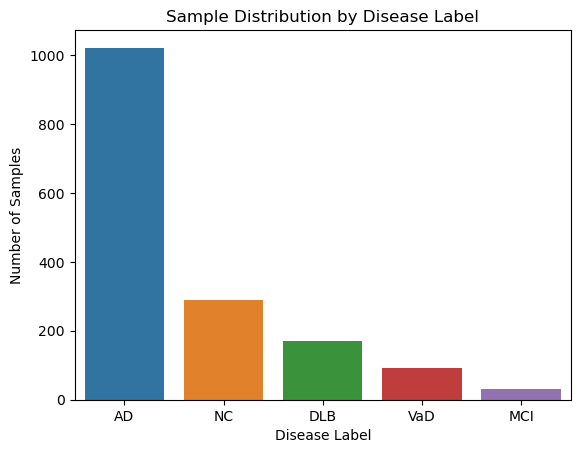

In [99]:
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.xlabel('Disease Label')
plt.ylabel('Number of Samples')
plt.title('Sample Distribution by Disease Label')
plt.show()

The label distribution as reported by Li et al. [1] Table 1.


| Disease Case | Sample Size |
|--------------|-------------|
| Alzheimer’s disease (AD) | 1,021 |
| Vascular dementia (VaD) | 91 |
| Dementia with lewy bodies (DLB) | 169 |
| Mild cognitive impairment (MCI) | 32 |
| Normal control (NC) | 288 |

Lets save the labels to csv file

In [100]:
expression_df.head()

,ID_REF,GSM3403761,GSM3403762,GSM3403763,GSM3403764,GSM3403765,GSM3403766,GSM3403767,GSM3403768,GSM3403769,...,GSM3405352,GSM3405353,GSM3405354,GSM3405355,GSM3405356,GSM3405357,GSM3405358,GSM3405359,GSM3405360,GSM3405361
0,MIMAT0000062,2.307579,1.503044,1.549877,1.560269,3.179096,4.319297,0.575922,-0.180237,1.491916,...,3.067457,2.289271,2.613345,4.197017,4.517667,2.018411,3.247889,2.605062,2.260922,2.434129
1,MIMAT0000063,2.307579,2.505380,1.983125,1.560269,3.302472,4.319297,1.964171,0.697365,1.491916,...,3.707958,2.289271,2.613345,4.197017,4.341310,2.018411,3.247889,2.605062,2.260922,2.434129
2,MIMAT0000064,2.307579,1.503044,1.549877,1.560269,3.179096,4.319297,0.575922,-0.180237,1.491916,...,2.222530,2.289271,2.613345,4.197017,2.413162,2.018411,3.247889,2.605062,2.260922,2.434129
3,MIMAT0000065,2.307579,1.503044,1.549877,1.560269,3.179096,4.319297,0.575922,-0.180237,1.491916,...,1.709051,2.289271,2.613345,4.197017,1.771996,2.018411,3.247889,2.605062,2.260922,2.434129
4,MIMAT0000066,2.307579,1.503044,1.549877,2.232974,4.793470,4.319297,0.575922,-0.180237,1.491916,...,2.841985,2.289271,2.613345,4.197017,3.368444,2.018411,3.247889,2.605062,2.260922,2.731162


In [101]:
expression_df.to_csv(f'{data_dir}/GSE120584_expression_data.csv', index=False)

In [102]:
label_df = pd.DataFrame()
label_df["ID_REF"] = list(sample_labels.keys())
label_df['LABEL'] = list(sample_labels.values())

In [103]:
label_df.head()

,ID_REF,LABEL
0,ID_REF,AD
1,GSM3403761,AD
2,GSM3403762,AD
3,GSM3403763,AD
4,GSM3403764,AD


In [104]:

label_df.to_csv(f'{data_dir}/GSE120584_sample_labels.csv', index=False)